In [247]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

from sklearn import datasets
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score #repeatly split the train and test data
import statsmodels.api as sm
from scipy import stats
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn import tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import confusion_matrix, accuracy_score, f1_score, precision_score, recall_score


In [248]:
# read the data

wine_df = pd.read_csv('D:/Mahdieh_CourseUniversity/University_courses/ALY6020/Final Project/wine.csv')

In [249]:
wine_df

,Unnamed: 0,fixed.acidity,volatile.acidity,citric.acid,residual.sugar,chlorides,free.sulfur.dioxide,total.sulfur.dioxide,density,pH,sulphates,alcohol,quality,wine
0,1,7.0,0.270,0.36,20.7,0.045,45.0,170.0,1.00100,3.00,0.45,8.8,6,white
1,2,6.3,0.300,0.34,1.6,0.049,14.0,132.0,0.99400,3.30,0.49,9.5,6,white
2,3,8.1,0.280,0.40,6.9,0.050,30.0,97.0,0.99510,3.26,0.44,10.1,6,white
3,4,7.2,0.230,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,6,white
4,5,7.2,0.230,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,6,white
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6489,6490,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5,red
6490,6491,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6,red
6491,6492,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6,red
6492,6493,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5,red


In [250]:
# see the number of observations and columns

wine_df.shape

(6494, 14)

In [251]:
# check missing values

wine_df.isnull().sum()

Unnamed: 0              0
fixed.acidity           0
volatile.acidity        0
citric.acid             0
residual.sugar          0
chlorides               0
free.sulfur.dioxide     0
total.sulfur.dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
wine                    0
dtype: int64

<AxesSubplot: >

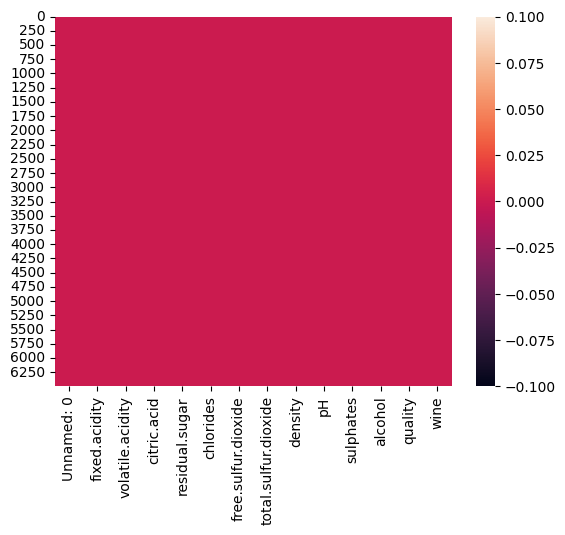

In [252]:
# visualize missing values

sns.heatmap(wine_df.isnull())

In [253]:
# Descriptive analysis

wine_df.describe()

,Unnamed: 0,fixed.acidity,volatile.acidity,citric.acid,residual.sugar,chlorides,free.sulfur.dioxide,total.sulfur.dioxide,density,pH,sulphates,alcohol,quality
count,6494.000000,6494.000000,6494.000000,6494.000000,6494.000000,6494.000000,6494.000000,6494.000000,6494.000000,6494.000000,6494.000000,6494.000000,6494.000000
mean,3247.500000,7.213451,0.339612,0.318483,5.443779,0.055934,30.528026,115.755544,0.994695,3.218656,0.530776,10.491381,5.818756
std,1874.800656,1.291896,0.164649,0.145046,4.758564,0.034350,17.752694,56.528647,0.002998,0.160647,0.146616,1.191633,0.873103
min,1.000000,3.800000,0.080000,0.000000,0.600000,0.009000,1.000000,6.000000,0.987110,2.720000,0.220000,8.000000,3.000000
25%,1624.250000,6.400000,0.230000,0.250000,1.800000,0.038000,17.000000,77.500000,0.992340,3.110000,0.430000,9.500000,5.000000
50%,3247.500000,7.000000,0.290000,0.310000,3.000000,0.047000,29.000000,118.000000,0.994885,3.210000,0.510000,10.300000,6.000000
75%,4870.750000,7.700000,0.400000,0.390000,8.100000,0.065000,41.000000,156.000000,0.996990,3.320000,0.600000,11.300000,6.000000
max,6494.000000,15.600000,1.580000,1.660000,65.800000,0.611000,289.000000,440.000000,1.038980,4.010000,1.980000,14.200000,9.000000


In [254]:
# drop column unnamed

wine_df = wine_df.drop(['Unnamed: 0'],axis=1)

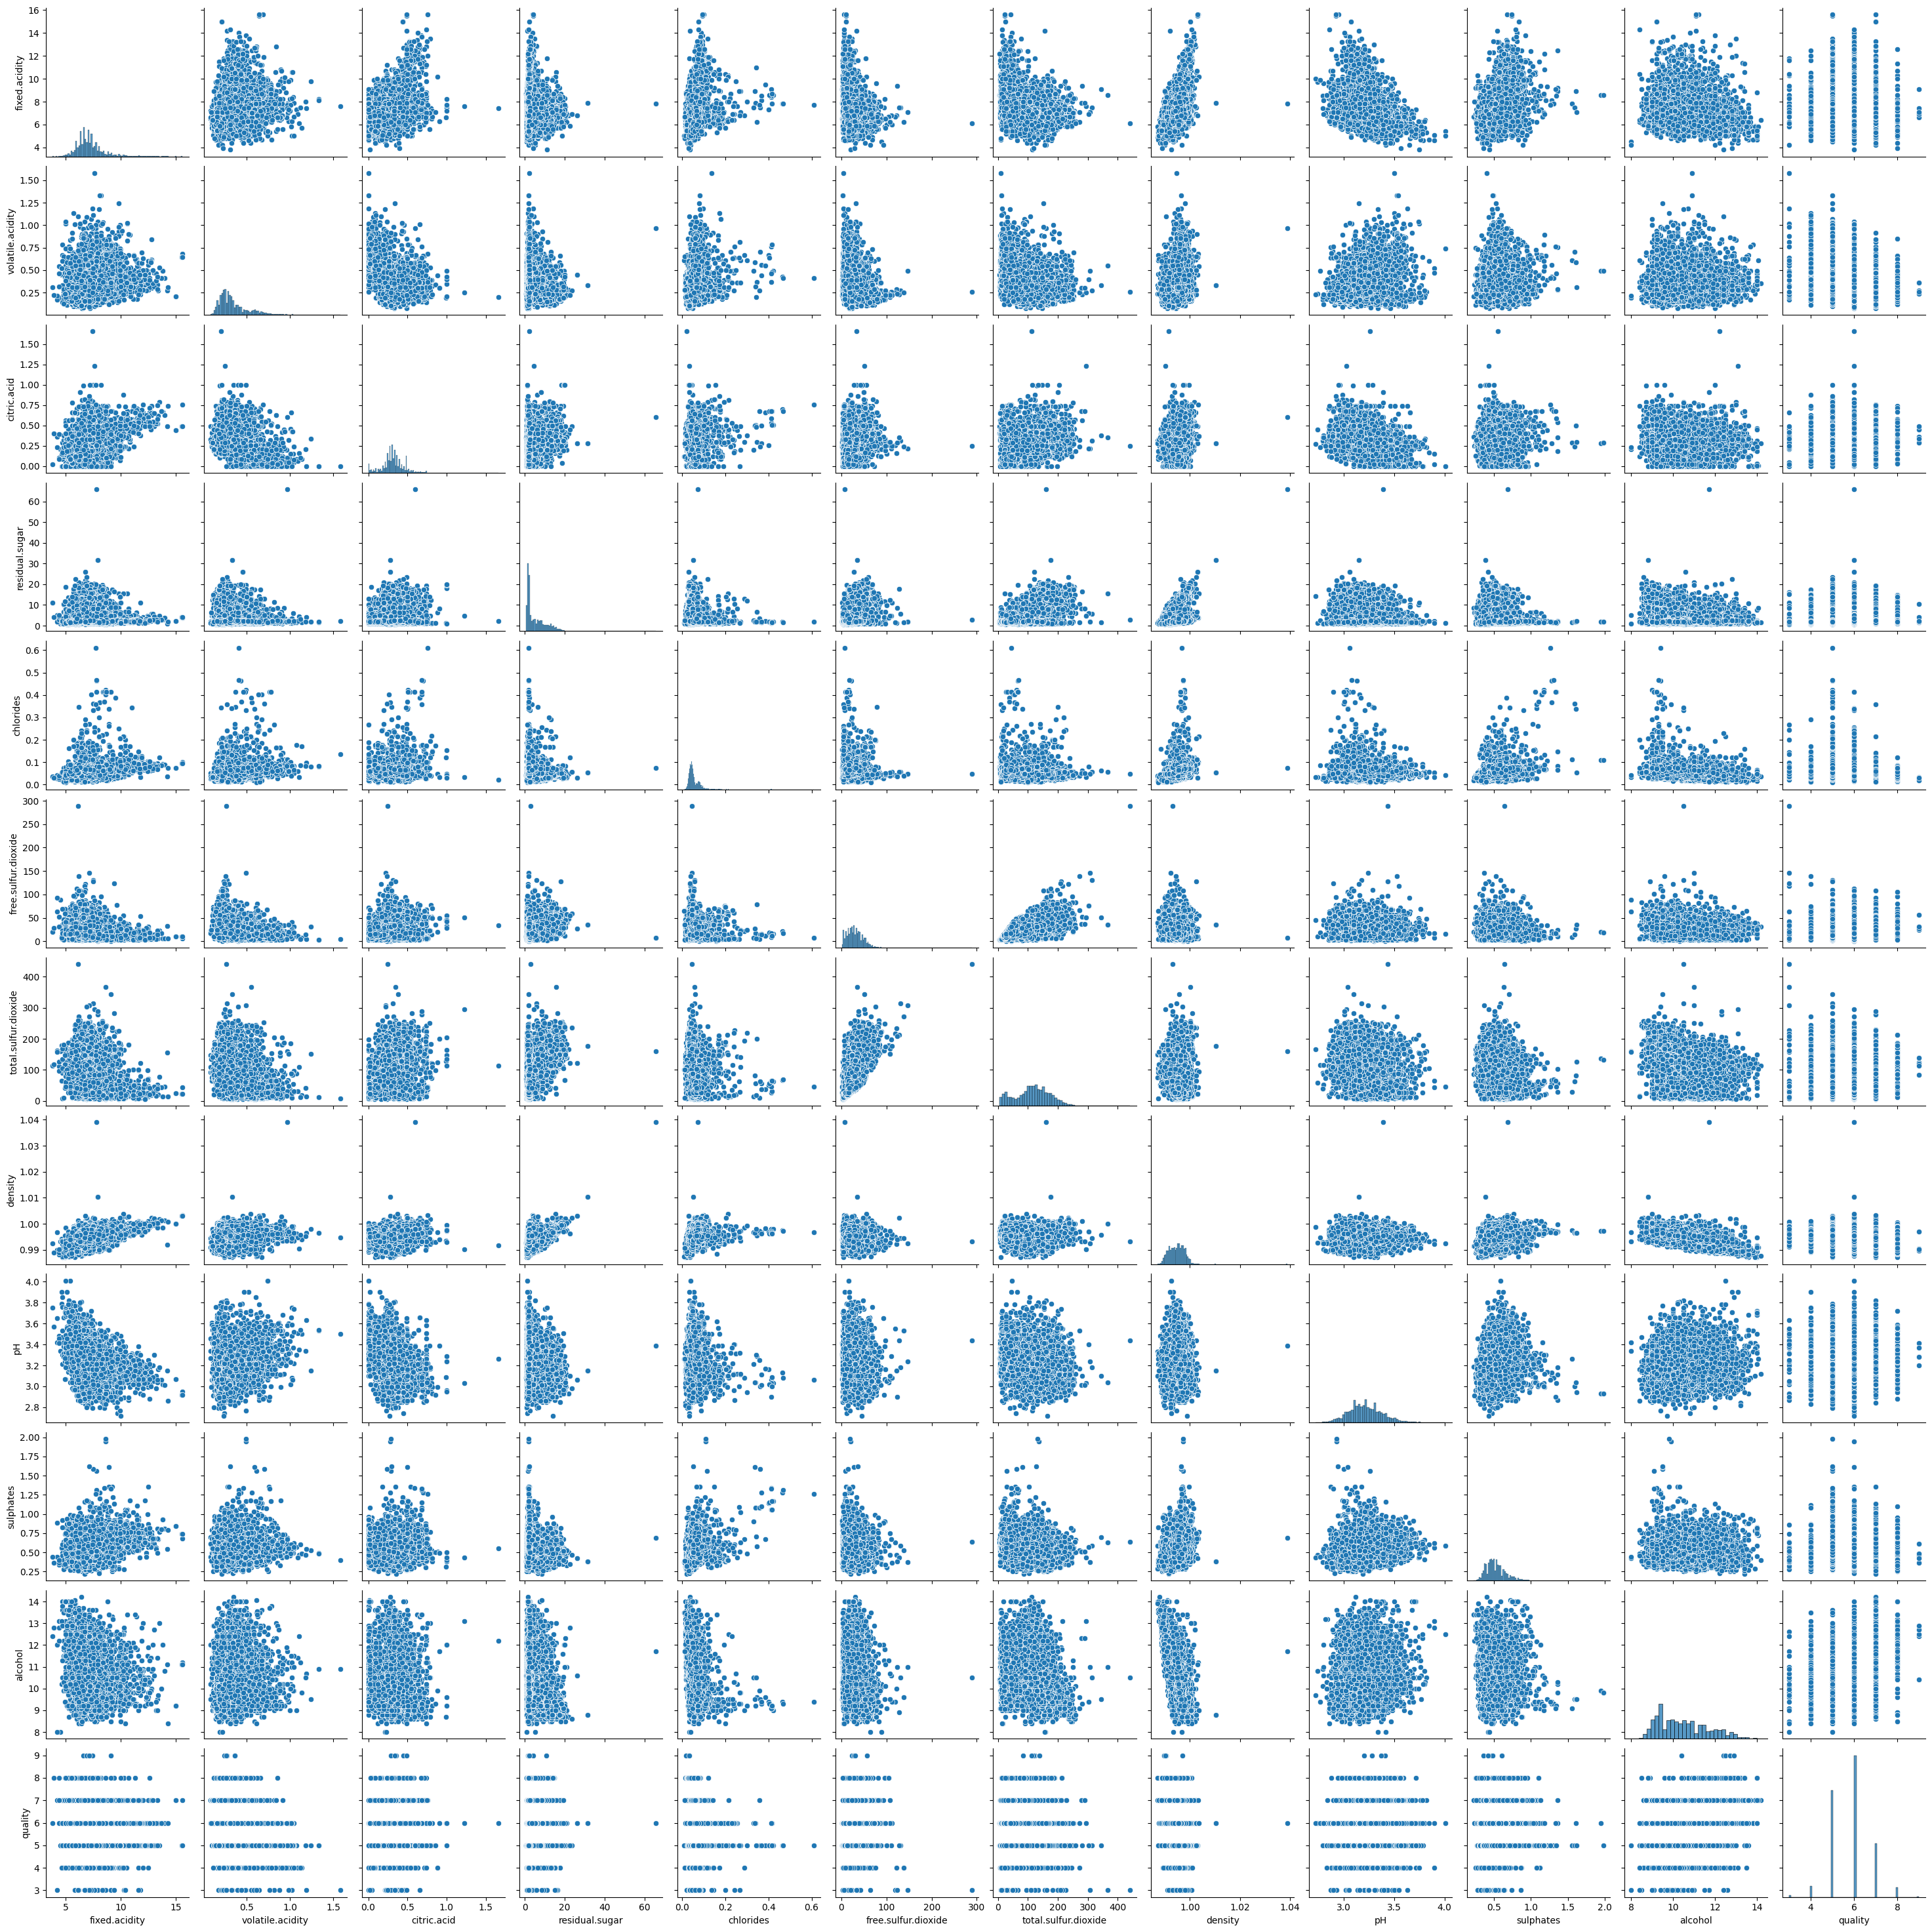

In [255]:
sns.pairplot(wine_df)

In [256]:
# correlation

wine_df.corr()

C:\Users\davod\AppData\Local\Temp\ipykernel_28036\166017781.py:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  wine_df.corr()


,fixed.acidity,volatile.acidity,citric.acid,residual.sugar,chlorides,free.sulfur.dioxide,total.sulfur.dioxide,density,pH,sulphates,alcohol,quality
fixed.acidity,1.000000,0.219325,0.322902,-0.112631,0.300051,-0.283231,-0.329366,0.459253,-0.251386,0.299098,-0.099450,-0.075632
volatile.acidity,0.219325,1.000000,-0.379635,-0.195887,0.381810,-0.352550,-0.414483,0.271017,0.262567,0.226356,-0.037535,-0.265509
citric.acid,0.322902,-0.379635,1.000000,0.142889,0.027851,0.133497,0.196566,0.094898,-0.328262,0.049575,-0.011187,0.087592
residual.sugar,-0.112631,-0.195887,0.142889,1.000000,-0.130375,0.402887,0.495611,0.552879,-0.267937,-0.187129,-0.360213,-0.037050
chlorides,0.300051,0.381810,0.027851,-0.130375,1.000000,-0.198955,-0.283180,0.365596,0.053759,0.382067,-0.260652,-0.199495
free.sulfur.dioxide,-0.283231,-0.352550,0.133497,0.402887,-0.198955,1.000000,0.721031,0.025854,-0.146257,-0.190413,-0.179811,0.055464
total.sulfur.dioxide,-0.329366,-0.414483,0.196566,0.495611,-0.283180,0.721031,1.000000,0.032689,-0.239163,-0.278942,-0.265709,-0.041798
density,0.459253,0.271017,0.094898,0.552879,0.365596,0.025854,0.032689,1.000000,0.012906,0.259419,-0.688012,-0.305446
pH,-0.251386,0.262567,-0.328262,-0.267937,0.053759,-0.146257,-0.239163,0.012906,1.000000,0.203009,0.121808,0.018422
sulphates,0.299098,0.226356,0.049575,-0.187129,0.382067,-0.190413,-0.278942,0.259419,0.203009,1.000000,-0.002126,0.042294


C:\Users\davod\AppData\Local\Temp\ipykernel_28036\3902685422.py:2: FutureWarning: The default value of numeric_only in DataFrame.corrwith is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  wine_df.corrwith(wine_df.quality).plot.bar(


<AxesSubplot: title={'center': 'Correlation with quality'}>

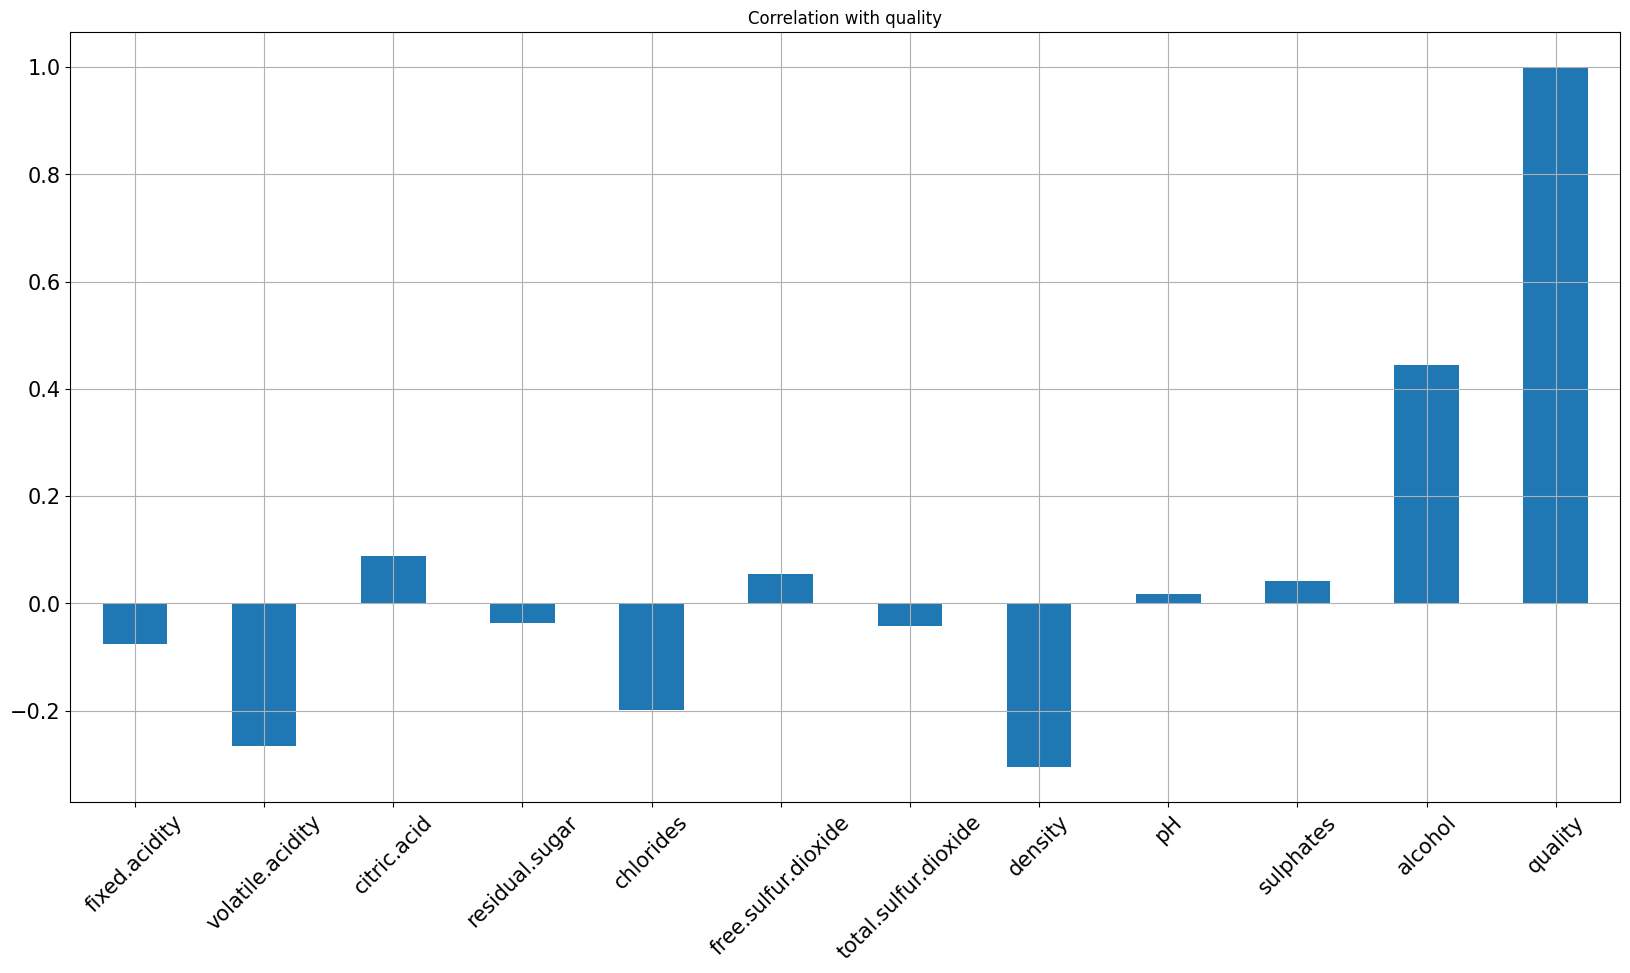

In [257]:
#Correlation with Quality with respect to attributes
wine_df.corrwith(wine_df.quality).plot.bar(
        figsize = (20, 10), title = "Correlation with quality", fontsize = 15,
        rot = 45, grid = True)

<AxesSubplot: >

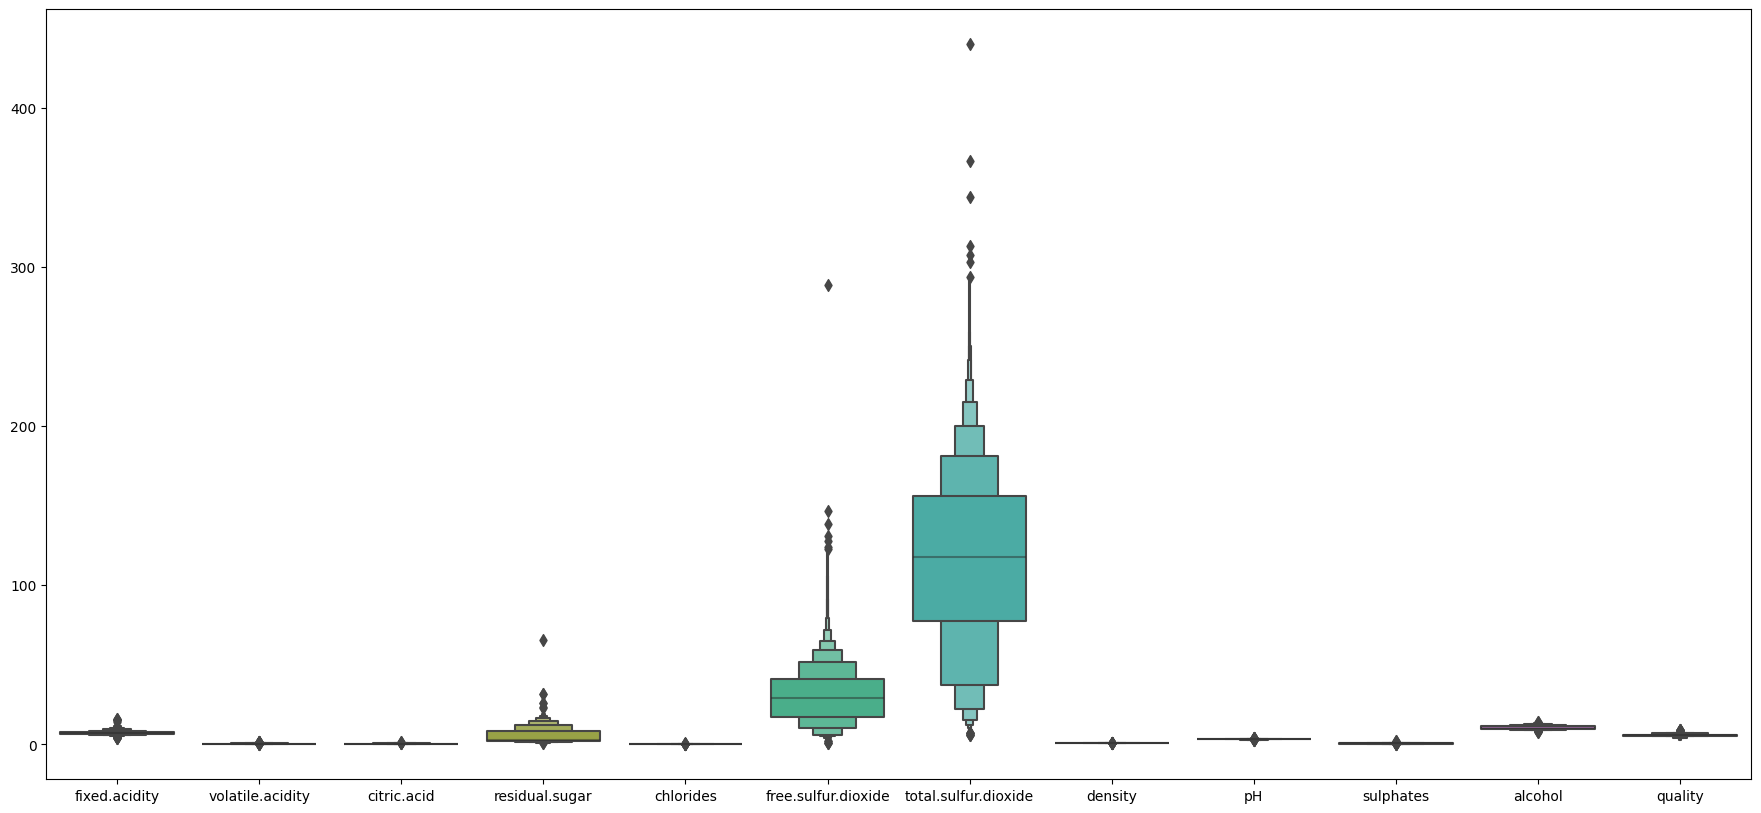

In [258]:
# check outliers

plt.figure(figsize=(22,10))
sns.boxenplot(wine_df)

<AxesSubplot: >

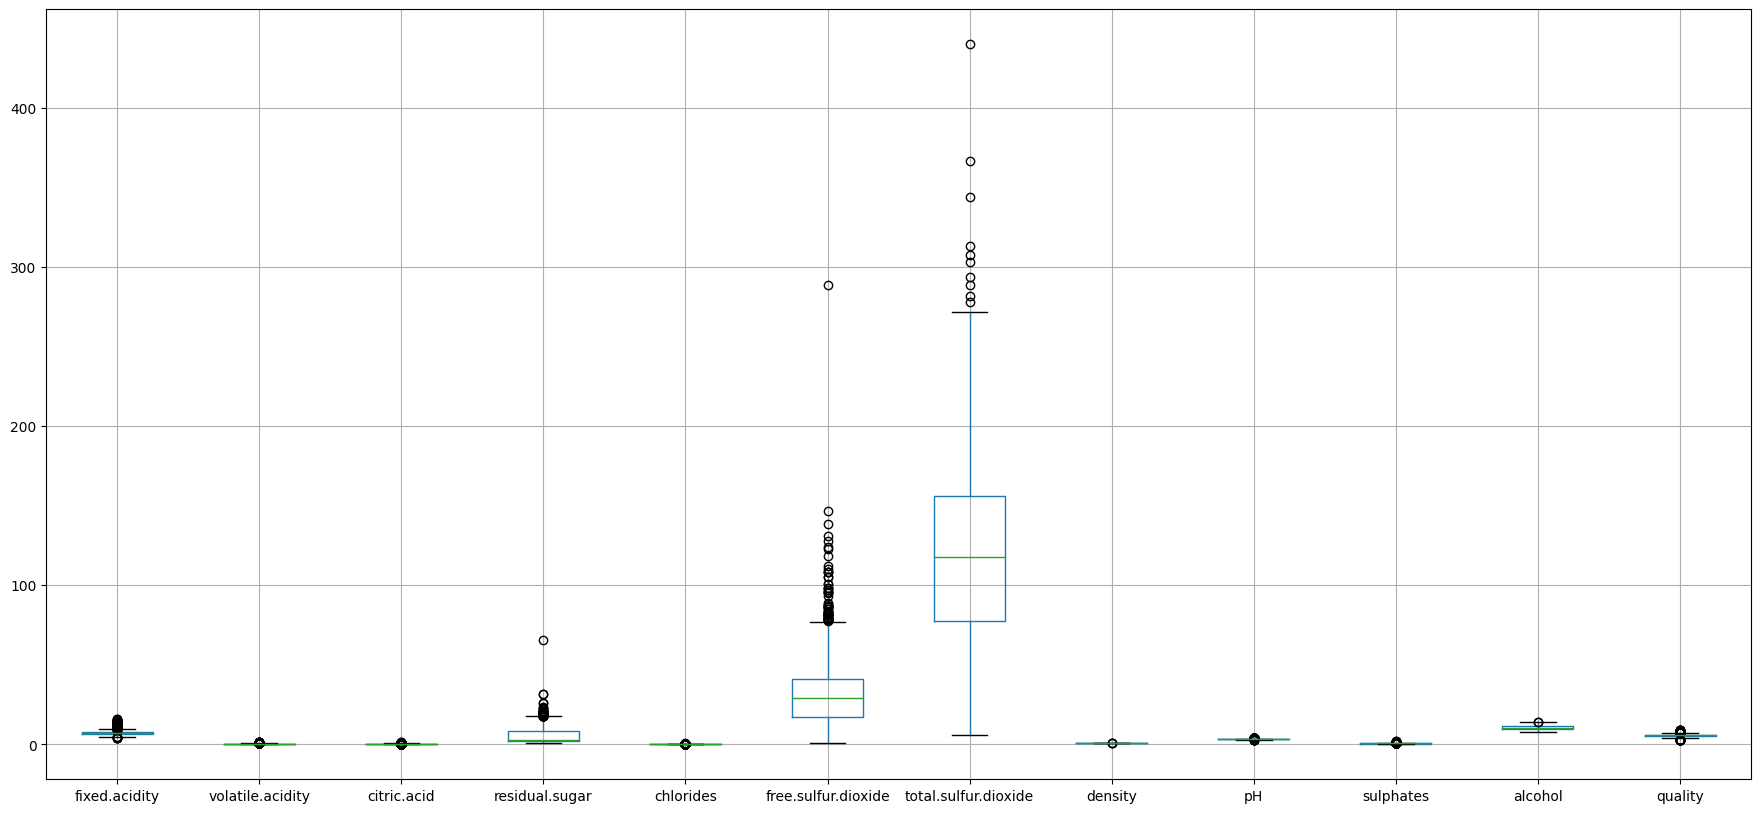

In [259]:
plt.figure(figsize=(22,10))
wine_df.boxplot()

In [260]:
# treat outliers with median to increase accuaracy of model

#total.sulfur.dioxide
print(wine_df['total.sulfur.dioxide'].quantile(0.50)) 
print(wine_df['total.sulfur.dioxide'].quantile(0.95)) 
wine_df['total.sulfur.dioxide'] = np.where(wine_df['total.sulfur.dioxide'] > 206, 118, wine_df['total.sulfur.dioxide'])
wine_df.describe()


118.0
206.0


,fixed.acidity,volatile.acidity,citric.acid,residual.sugar,chlorides,free.sulfur.dioxide,total.sulfur.dioxide,density,pH,sulphates,alcohol,quality
count,6494.000000,6494.000000,6494.000000,6494.000000,6494.000000,6494.000000,6494.000000,6494.000000,6494.000000,6494.000000,6494.000000,6494.000000
mean,7.213451,0.339612,0.318483,5.443779,0.055934,30.528026,110.433323,0.994695,3.218656,0.530776,10.491381,5.818756
std,1.291896,0.164649,0.145046,4.758564,0.034350,17.752694,50.379798,0.002998,0.160647,0.146616,1.191633,0.873103
min,3.800000,0.080000,0.000000,0.600000,0.009000,1.000000,6.000000,0.987110,2.720000,0.220000,8.000000,3.000000
25%,6.400000,0.230000,0.250000,1.800000,0.038000,17.000000,77.500000,0.992340,3.110000,0.430000,9.500000,5.000000
50%,7.000000,0.290000,0.310000,3.000000,0.047000,29.000000,118.000000,0.994885,3.210000,0.510000,10.300000,6.000000
75%,7.700000,0.400000,0.390000,8.100000,0.065000,41.000000,148.000000,0.996990,3.320000,0.600000,11.300000,6.000000
max,15.600000,1.580000,1.660000,65.800000,0.611000,289.000000,206.000000,1.038980,4.010000,1.980000,14.200000,9.000000


In [261]:
# treat outliers with median to increase accuaracy of model

#free.sulfur.dioxide
print(wine_df['free.sulfur.dioxide'].quantile(0.50)) 
print(wine_df['free.sulfur.dioxide'].quantile(0.95)) 
wine_df['free.sulfur.dioxide'] = np.where(wine_df['free.sulfur.dioxide'] > 61, 29, wine_df['free.sulfur.dioxide'])
wine_df.describe()

29.0
61.0


,fixed.acidity,volatile.acidity,citric.acid,residual.sugar,chlorides,free.sulfur.dioxide,total.sulfur.dioxide,density,pH,sulphates,alcohol,quality
count,6494.000000,6494.000000,6494.000000,6494.000000,6494.000000,6494.000000,6494.000000,6494.000000,6494.000000,6494.000000,6494.000000,6494.000000
mean,7.213451,0.339612,0.318483,5.443779,0.055934,28.481752,110.433323,0.994695,3.218656,0.530776,10.491381,5.818756
std,1.291896,0.164649,0.145046,4.758564,0.034350,14.538250,50.379798,0.002998,0.160647,0.146616,1.191633,0.873103
min,3.800000,0.080000,0.000000,0.600000,0.009000,1.000000,6.000000,0.987110,2.720000,0.220000,8.000000,3.000000
25%,6.400000,0.230000,0.250000,1.800000,0.038000,17.000000,77.500000,0.992340,3.110000,0.430000,9.500000,5.000000
50%,7.000000,0.290000,0.310000,3.000000,0.047000,29.000000,118.000000,0.994885,3.210000,0.510000,10.300000,6.000000
75%,7.700000,0.400000,0.390000,8.100000,0.065000,38.875000,148.000000,0.996990,3.320000,0.600000,11.300000,6.000000
max,15.600000,1.580000,1.660000,65.800000,0.611000,61.000000,206.000000,1.038980,4.010000,1.980000,14.200000,9.000000


In [262]:
# treat outliers with median to increase accuaracy of model

#residual.sugar
print(wine_df['residual.sugar'].quantile(0.50)) 
print(wine_df['residual.sugar'].quantile(0.95)) 
wine_df['residual.sugar'] = np.where(wine_df['residual.sugar'] > 15, 3, wine_df['residual.sugar'])
wine_df.describe()

3.0
15.0


,fixed.acidity,volatile.acidity,citric.acid,residual.sugar,chlorides,free.sulfur.dioxide,total.sulfur.dioxide,density,pH,sulphates,alcohol,quality
count,6494.000000,6494.000000,6494.000000,6494.000000,6494.000000,6494.000000,6494.000000,6494.000000,6494.000000,6494.000000,6494.000000,6494.000000
mean,7.213451,0.339612,0.318483,4.725847,0.055934,28.481752,110.433323,0.994695,3.218656,0.530776,10.491381,5.818756
std,1.291896,0.164649,0.145046,3.839235,0.034350,14.538250,50.379798,0.002998,0.160647,0.146616,1.191633,0.873103
min,3.800000,0.080000,0.000000,0.600000,0.009000,1.000000,6.000000,0.987110,2.720000,0.220000,8.000000,3.000000
25%,6.400000,0.230000,0.250000,1.800000,0.038000,17.000000,77.500000,0.992340,3.110000,0.430000,9.500000,5.000000
50%,7.000000,0.290000,0.310000,3.000000,0.047000,29.000000,118.000000,0.994885,3.210000,0.510000,10.300000,6.000000
75%,7.700000,0.400000,0.390000,7.100000,0.065000,38.875000,148.000000,0.996990,3.320000,0.600000,11.300000,6.000000
max,15.600000,1.580000,1.660000,15.000000,0.611000,61.000000,206.000000,1.038980,4.010000,1.980000,14.200000,9.000000


<AxesSubplot: >

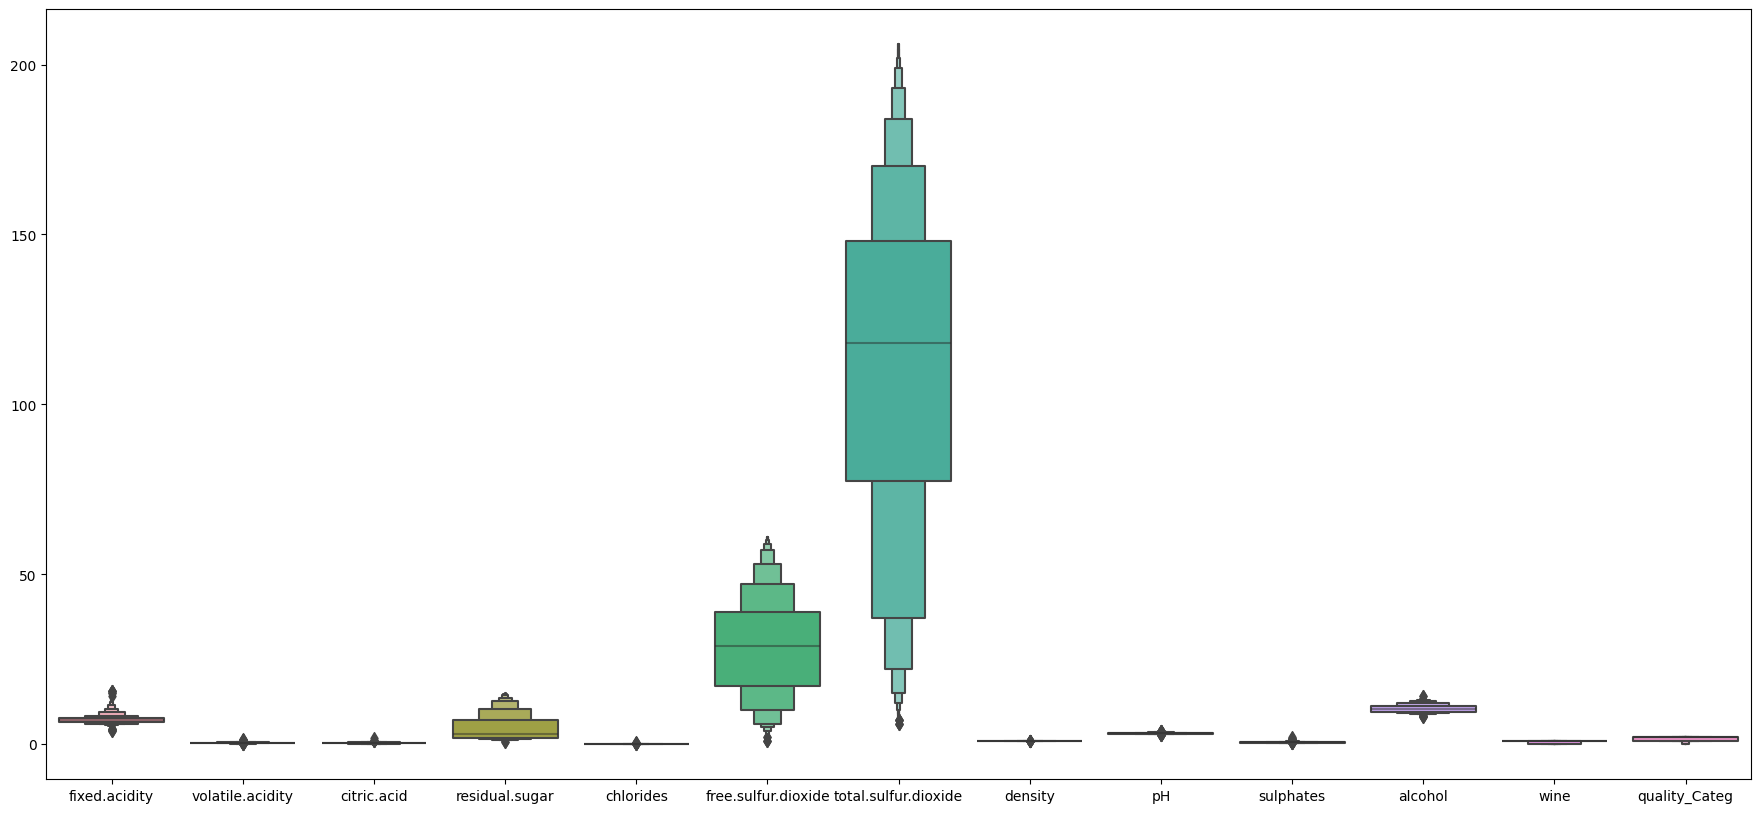

In [294]:
# check outliers after treating

plt.figure(figsize=(22,10))
sns.boxenplot(wine_df)

In [263]:
# Add a column 'quality_Categ'

# create function
def add_quality_category(wine_set):
    low = wine_set[wine_set['quality'] <= 5]
    medium = wine_set[(wine_set['quality'] == 6) | (wine_set['quality'] == 7)]
    high = wine_set[wine_set['quality'] > 7]
    
    low['quality_Categ'] = 'low'
    medium['quality_Categ'] = 'medium'
    high['quality_Categ'] = 'high'
    
    frames = [low, medium, high]
    return pd.concat(frames)

In [264]:
#add new column to dataset

wine_df = add_quality_category(wine_df)

C:\Users\davod\AppData\Local\Temp\ipykernel_28036\2679851387.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  low['quality_Categ'] = 'low'
C:\Users\davod\AppData\Local\Temp\ipykernel_28036\2679851387.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  medium['quality_Categ'] = 'medium'
C:\Users\davod\AppData\Local\Temp\ipykernel_28036\2679851387.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See 

In [265]:
#drop quality column from dataset

wine_df = wine_df.drop(['quality'], axis=1)

In [266]:
# change variable to dummy/numeric

# wine_df = pd.get_dummies(wine_df , columns= ['wine','quality_Categ'])

# or change variable to numeric
wine_df['wine'] = LabelEncoder().fit_transform(wine_df['wine'])
wine_df['quality_Categ'] = LabelEncoder().fit_transform(wine_df['quality_Categ'])

In [267]:
# indicate predictor and predicted variables

y = wine_df['wine']

x = wine_df.drop(['wine'], axis=1)

# split our data into training and testing data

x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2)

In [268]:
#Feature Scaling

from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)

In [269]:
# examine KNN and find optimal K

k_range = list(range(1,15))
accuracy = []

for i in k_range:

    knn = KNeighborsClassifier(n_neighbors=i).fit(x_train,y_train)
    y_predict = knn.predict(x_test)
    accuracy.append(metrics.accuracy_score(y_test,y_predict))

In [270]:
accuracy

[0.9923017705927637,
 0.9869130100076983,
 0.9907621247113164,
 0.9869130100076983,
 0.9869130100076983,
 0.9861431870669746,
 0.9869130100076983,
 0.9884526558891455,
 0.9869130100076983,
 0.9876828329484219,
 0.9869130100076983,
 0.9869130100076983,
 0.9876828329484219,
 0.9869130100076983]

In [271]:
# perform model with optimal K

knn = KNeighborsClassifier(n_neighbors=1).fit(x_train,y_train)
y_predict = knn.predict(x_test)

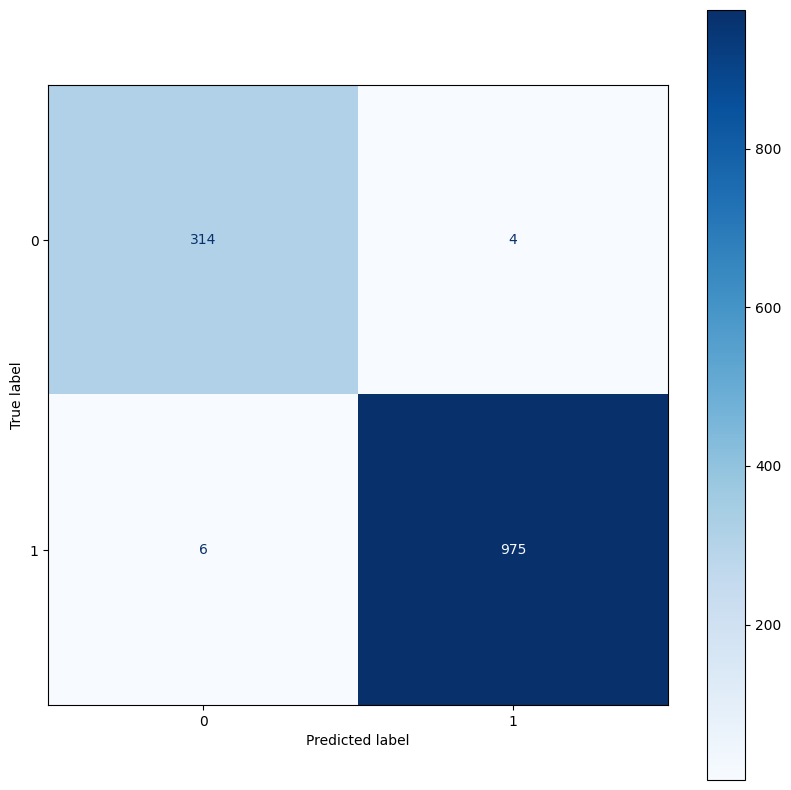

In [272]:
# Build the confusion matrix
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

cf_mat = confusion_matrix(y_test, y_predict)

# Display it
cm_fig, cm_ax = plt.subplots(figsize=(10, 10))
cf_mat_disp = ConfusionMatrixDisplay(cf_mat)
cf_mat_disp.plot(ax=cm_ax, cmap=plt.cm.Blues)
plt.show()

In [273]:
# classification_report for KNN

print(metrics.classification_report(y_test, y_predict)) 
print(metrics.confusion_matrix(y_test, y_predict))

              precision    recall  f1-score   support

           0       0.98      0.99      0.98       318
           1       1.00      0.99      0.99       981

    accuracy                           0.99      1299
   macro avg       0.99      0.99      0.99      1299
weighted avg       0.99      0.99      0.99      1299

[[314   4]
 [  6 975]]


In [274]:
# Comparing Models

acc = accuracy_score(y_test, y_predict)
prec = precision_score(y_test, y_predict)
rec = recall_score(y_test, y_predict)
f1 = f1_score(y_test, y_predict)
results = pd.DataFrame([['KNN', acc, prec, rec, f1]],
               columns = ['Model', 'Accuracy', 'Precision', 'Recall', 'F1 Score'])
print(results)

  Model  Accuracy  Precision    Recall  F1 Score
0   KNN  0.992302   0.995914  0.993884  0.994898


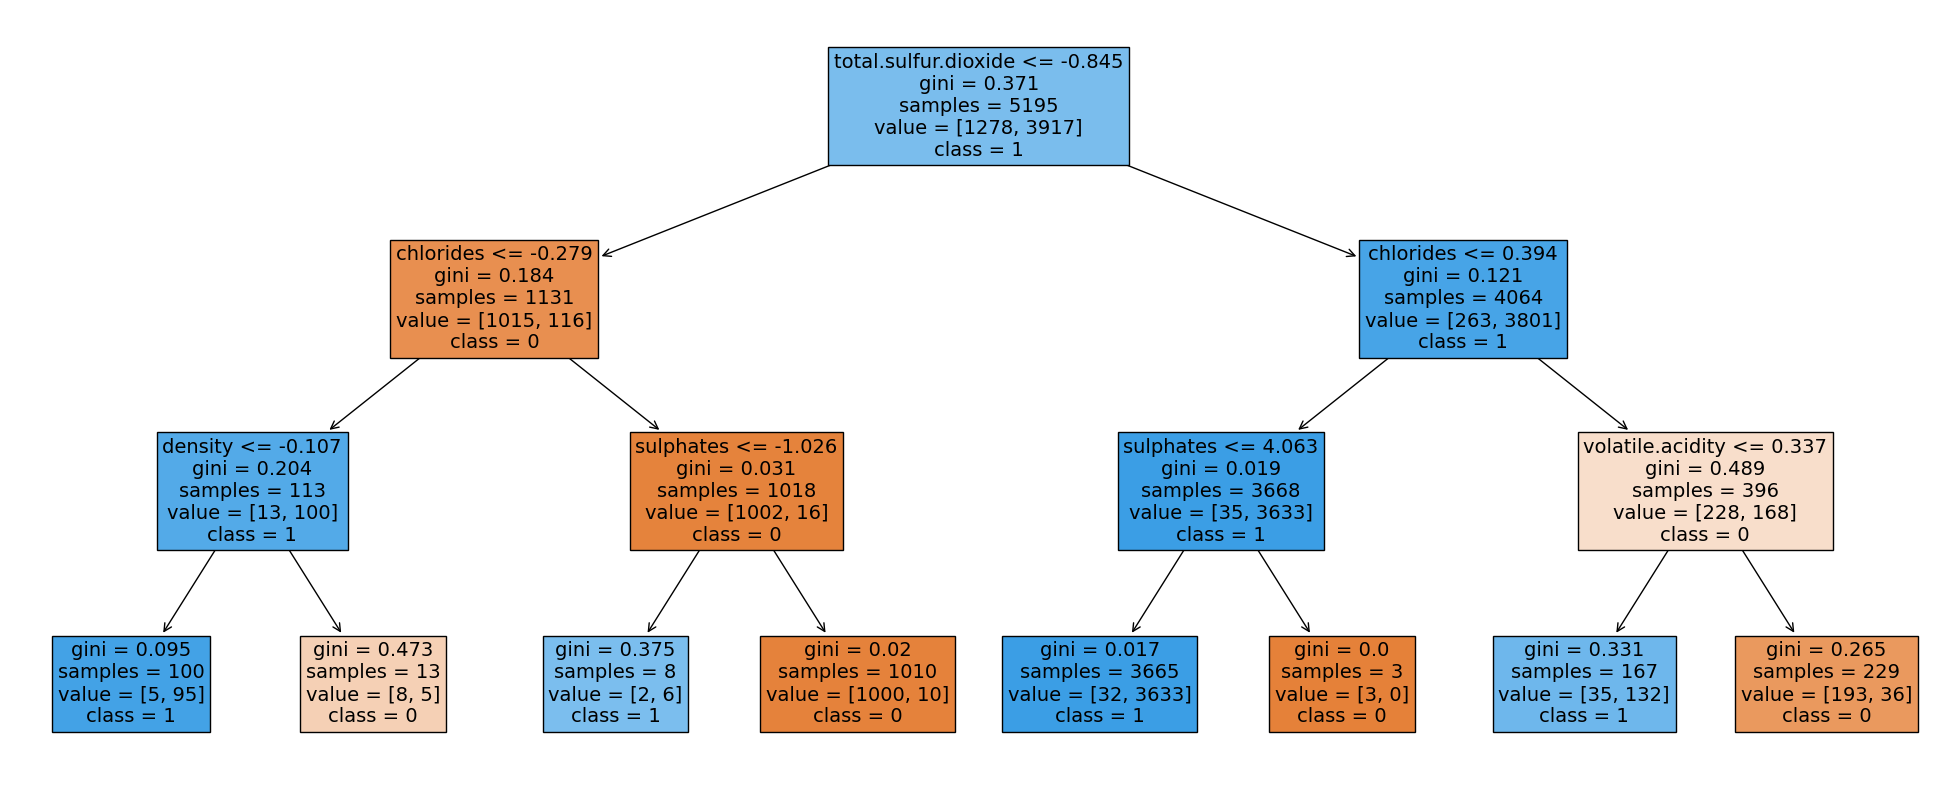

In [275]:
# examine decision tree

treemodel = DecisionTreeClassifier(max_depth= 3)
treemodel.fit(x_train,y_train)
plt.figure(figsize=(25,10))
plot = tree.plot_tree(treemodel,feature_names=x.columns.values.tolist() , class_names=['0','1'], filled= True , fontsize=14)

In [276]:
model = treemodel.fit(x_train , y_train)
y_treepred = model.predict(x_test)
print("accuracy" , metrics.accuracy_score(y_test,y_treepred))

accuracy 0.9715165511932256


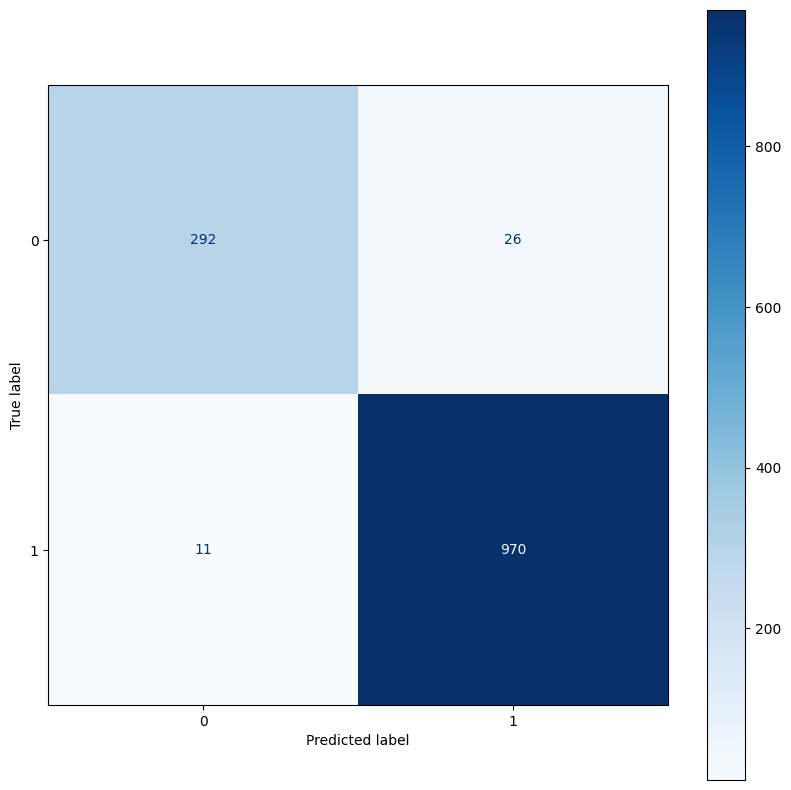

In [277]:
# Build the confusion matrix
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

cf_mat = confusion_matrix(y_test, y_treepred)

# Display it
cm_fig, cm_ax = plt.subplots(figsize=(10, 10))
cf_mat_disp = ConfusionMatrixDisplay(cf_mat)
cf_mat_disp.plot(ax=cm_ax, cmap=plt.cm.Blues)
plt.show()

In [278]:
# classification_report for decision tree

print(metrics.classification_report(y_test, y_treepred)) 
print(metrics.confusion_matrix(y_test, y_treepred))

              precision    recall  f1-score   support

           0       0.96      0.92      0.94       318
           1       0.97      0.99      0.98       981

    accuracy                           0.97      1299
   macro avg       0.97      0.95      0.96      1299
weighted avg       0.97      0.97      0.97      1299

[[292  26]
 [ 11 970]]


In [279]:
# Comparing Models

acc = accuracy_score(y_test, y_treepred)
prec = precision_score(y_test, y_treepred)
rec = recall_score(y_test, y_treepred)
f1 = f1_score(y_test, y_treepred)
model_results  = pd.DataFrame([['decision tree', acc, prec, rec, f1]],
               columns = ['Model', 'Accuracy', 'Precision', 'Recall', 'F1 Score'])
results = results.append(model_results, ignore_index = True)
print(results)

           Model  Accuracy  Precision    Recall  F1 Score
0            KNN  0.992302   0.995914  0.993884  0.994898
1  decision tree  0.971517   0.973896  0.988787  0.981285


C:\Users\davod\AppData\Local\Temp\ipykernel_28036\2993509100.py:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results = results.append(model_results, ignore_index = True)


In [280]:
# examine random forest
rfclass = RandomForestClassifier(n_estimators= 20 , random_state=0)
rfclass.fit(x_train,y_train)
rfypred = rfclass.predict(x_test)
print("accuracy" , rfclass.score(x_test,y_test))


accuracy 0.9930715935334873


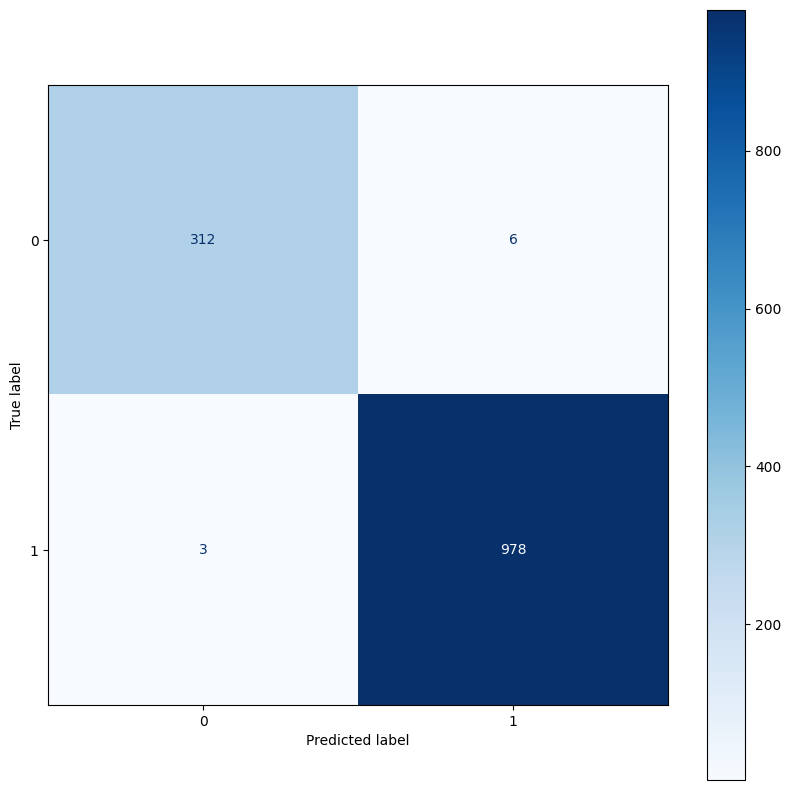

In [281]:
# Build the confusion matrix
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

cf_mat = confusion_matrix(y_test, rfypred)

# Display it
cm_fig, cm_ax = plt.subplots(figsize=(10, 10))
cf_mat_disp = ConfusionMatrixDisplay(cf_mat)
cf_mat_disp.plot(ax=cm_ax, cmap=plt.cm.Blues)
plt.show()

In [282]:
# classification_report for random forest

print(metrics.classification_report(y_test, rfypred)) 
print(metrics.confusion_matrix(y_test, rfypred))

              precision    recall  f1-score   support

           0       0.99      0.98      0.99       318
           1       0.99      1.00      1.00       981

    accuracy                           0.99      1299
   macro avg       0.99      0.99      0.99      1299
weighted avg       0.99      0.99      0.99      1299

[[312   6]
 [  3 978]]


In [283]:
# Comparing Models

acc = accuracy_score(y_test, rfypred)
prec = precision_score(y_test, rfypred)
rec = recall_score(y_test, rfypred)
f1 = f1_score(y_test, rfypred)
model_results  = pd.DataFrame([['Random Forest', acc, prec, rec, f1]],
               columns = ['Model', 'Accuracy', 'Precision', 'Recall', 'F1 Score'])
results = results.append(model_results, ignore_index = True)
print(results)

           Model  Accuracy  Precision    Recall  F1 Score
0            KNN  0.992302   0.995914  0.993884  0.994898
1  decision tree  0.971517   0.973896  0.988787  0.981285
2  Random Forest  0.993072   0.993902  0.996942  0.995420


C:\Users\davod\AppData\Local\Temp\ipykernel_28036\338522782.py:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results = results.append(model_results, ignore_index = True)


In [284]:
# examine gradient boosting

gbclass = GradientBoostingClassifier(n_estimators=20 , random_state=None)
gbclass.fit(x_train,y_train)
gbypred = gbclass.predict(x_test)
print("accuracy" ,gbclass.score(x_test,y_test))

accuracy 0.9884526558891455


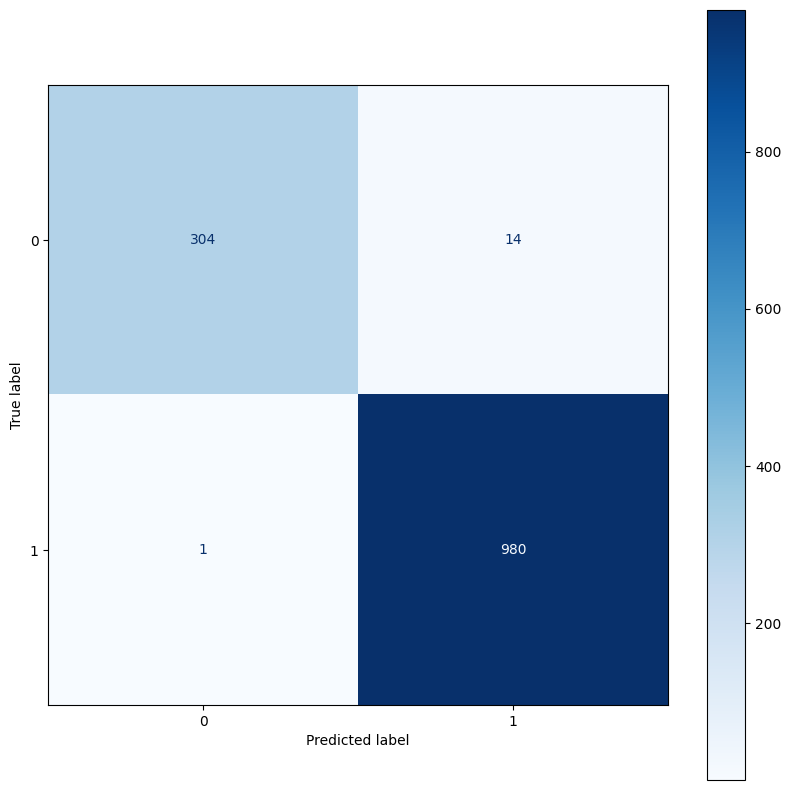

In [285]:
# Build the confusion matrix
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

cf_mat = confusion_matrix(y_test, gbypred)

# Display it
cm_fig, cm_ax = plt.subplots(figsize=(10, 10))
cf_mat_disp = ConfusionMatrixDisplay(cf_mat)
cf_mat_disp.plot(ax=cm_ax, cmap=plt.cm.Blues)
plt.show()

In [286]:
# classification_report for gradient boosting

print(metrics.classification_report(y_test, gbypred)) 
print(metrics.confusion_matrix(y_test, gbypred))

              precision    recall  f1-score   support

           0       1.00      0.96      0.98       318
           1       0.99      1.00      0.99       981

    accuracy                           0.99      1299
   macro avg       0.99      0.98      0.98      1299
weighted avg       0.99      0.99      0.99      1299

[[304  14]
 [  1 980]]


In [287]:
# Comparing Models

acc = accuracy_score(y_test, gbypred)
prec = precision_score(y_test, gbypred)
rec = recall_score(y_test, gbypred)
f1 = f1_score(y_test, gbypred)
model_results  = pd.DataFrame([['gradient boosting', acc, prec, rec, f1]],
               columns = ['Model', 'Accuracy', 'Precision', 'Recall', 'F1 Score'])
results = results.append(model_results, ignore_index = True)
print(results)

               Model  Accuracy  Precision    Recall  F1 Score
0                KNN  0.992302   0.995914  0.993884  0.994898
1      decision tree  0.971517   0.973896  0.988787  0.981285
2      Random Forest  0.993072   0.993902  0.996942  0.995420
3  gradient boosting  0.988453   0.985915  0.998981  0.992405


C:\Users\davod\AppData\Local\Temp\ipykernel_28036\74276350.py:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results = results.append(model_results, ignore_index = True)


In [288]:
# examine neural network using solver sgd

#solver{‘lbfgs’, ‘sgd’, ‘adam’}, default=’adam’
#The solver for weight optimization.

#‘lbfgs’ is an optimizer in the family of quasi-Newton methods.

#‘sgd’ refers to stochastic gradient descent.

#‘adam’ refers to a stochastic gradient-based optimizer proposed by Kingma, Diederik, and Jimmy Ba

from sklearn.neural_network import MLPClassifier
mlp = MLPClassifier(hidden_layer_sizes=(27,), solver='sgd',learning_rate_init= 0.01 , max_iter= 20000)
mlp.fit(x_train,y_train)
predicted_y = mlp.predict(x_test)
print("accuracy" ,mlp.score(x_test,y_test))


accuracy 0.9907621247113164


In [289]:
# examine neural network using solver lbfgs

from sklearn.neural_network import MLPClassifier
mlp = MLPClassifier(hidden_layer_sizes=(27,), solver='lbfgs',learning_rate_init= 0.01 , max_iter= 20000)
mlp.fit(x_train,y_train)
predicted_y = mlp.predict(x_test)
print("accuracy" ,mlp.score(x_test,y_test))

accuracy 0.9946112394149346


In [290]:
# examine neural network using solver adam

from sklearn.neural_network import MLPClassifier
mlp = MLPClassifier(hidden_layer_sizes=(27,), solver='adam',learning_rate_init= 0.01 , max_iter= 20000)
mlp.fit(x_train,y_train)
predicted_y = mlp.predict(x_test)
print("accuracy" ,mlp.score(x_test,y_test))

accuracy 0.9961508852963818


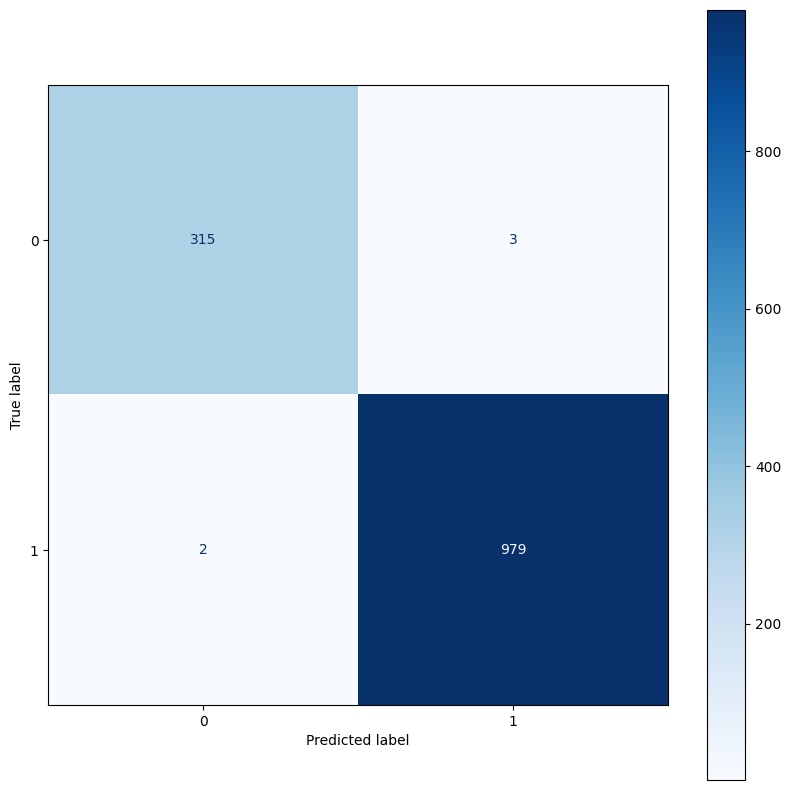

In [291]:
# Build the confusion matrix
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

cf_mat = confusion_matrix(y_test, predicted_y)

# Display it
cm_fig, cm_ax = plt.subplots(figsize=(10, 10))
cf_mat_disp = ConfusionMatrixDisplay(cf_mat)
cf_mat_disp.plot(ax=cm_ax, cmap=plt.cm.Blues)
plt.show()



In [292]:
# classification_report for neural network 

print(metrics.classification_report(y_test, predicted_y)) 
print(metrics.confusion_matrix(y_test, predicted_y))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99       318
           1       1.00      1.00      1.00       981

    accuracy                           1.00      1299
   macro avg       1.00      0.99      0.99      1299
weighted avg       1.00      1.00      1.00      1299

[[315   3]
 [  2 979]]


In [293]:
# Comparing Models

acc = accuracy_score(y_test, predicted_y)
prec = precision_score(y_test, predicted_y)
rec = recall_score(y_test, predicted_y)
f1 = f1_score(y_test, predicted_y)
model_results  = pd.DataFrame([['neural network ', acc, prec, rec, f1]],
               columns = ['Model', 'Accuracy', 'Precision', 'Recall', 'F1 Score'])
results = results.append(model_results, ignore_index = True)
print(results)

               Model  Accuracy  Precision    Recall  F1 Score
0                KNN  0.992302   0.995914  0.993884  0.994898
1      decision tree  0.971517   0.973896  0.988787  0.981285
2      Random Forest  0.993072   0.993902  0.996942  0.995420
3  gradient boosting  0.988453   0.985915  0.998981  0.992405
4    neural network   0.996151   0.996945  0.997961  0.997453


C:\Users\davod\AppData\Local\Temp\ipykernel_28036\2526028468.py:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results = results.append(model_results, ignore_index = True)
